### Analyse (TRAVAIL PRATIQUE DU COURS DE DATAMINING)
---

### Libraries

#### Installation

In [1]:
# %pip install pandas numpy
# %pip install --upgrade pip
# %pip install polars
# %pip install matplotlib plotly
# %pip install fastexcel
# %pip install pyarrow
# %pip install openpyxl
# %pip install seaborn
# %pip install scikit-learn
# %pip install statsmodels
# %pip install plotnine
%pip install tabulate colorama

Note: you may need to restart the kernel to use updated packages.


#### Importation des librairies

In [66]:
import pandas as pd # type: ignore
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from plotnine import * # type: ignore  # noqa: F403
import scipy.stats as ss
from tabulate import tabulate
from colorama import Fore, Style, Back

#### Data Cleaning & Preprocessing
---

In [3]:
data_pl = pl.read_excel("data.xlsx") # with Polars
data_pd = pd.read_excel("data.xlsx") # With Pandas
ctx = pl.SQLContext(data=data_pl, eager=True) # For SQL

In [4]:
print(data_pl)

shape: (5_744, 19)
┌───────────┬───────┬──────────────┬──────────────┬───┬─────────┬──────────┬───────────┬────────┐
│ CATEGORIE ┆ GRADE ┆ DERNIER      ┆ SALAIRE PERS ┆ … ┆ ENERGIE ┆ IFT      ┆ IDP       ┆ IPM    │
│ ---       ┆ ---   ┆ AVACEMENT EN ┆ ---          ┆   ┆ ---     ┆ ---      ┆ ---       ┆ ---    │
│ str       ┆ str   ┆ GRADE        ┆ f64          ┆   ┆ i64     ┆ f64      ┆ f64       ┆ i64    │
│           ┆       ┆ ---          ┆              ┆   ┆         ┆          ┆           ┆        │
│           ┆       ┆ date         ┆              ┆   ┆         ┆          ┆           ┆        │
╞═══════════╪═══════╪══════════════╪══════════════╪═══╪═════════╪══════════╪═══════════╪════════╡
│ M&C       ┆ 11    ┆ 1998-07-01   ┆ 47865.44225  ┆ … ┆ 12045   ┆ 97837.51 ┆ 126115.18 ┆ 348500 │
│ M&C       ┆ 11    ┆ 1998-09-01   ┆ 47652.18334  ┆ … ┆ 12045   ┆ 97837.51 ┆ 126115.18 ┆ 348500 │
│ M&C       ┆ 11    ┆ 2000-08-01   ┆ 47348.71096  ┆ … ┆ 12045   ┆ 97837.51 ┆ 126115.18 ┆ 348500 │
│

In [5]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CATEGORIE                   5744 non-null   object        
 1   GRADE                       5744 non-null   int64         
 2   DERNIER AVACEMENT EN GRADE  5742 non-null   datetime64[ns]
 3   SALAIRE PERS                5744 non-null   float64       
 4   CITE                        5744 non-null   object        
 5   SEXE                        5744 non-null   object        
 6   ETATCIVIL                   5678 non-null   object        
 7   INDEPOUSE                   5534 non-null   float64       
 8   ENFANT                      5744 non-null   int64         
 9   COTATION                    2536 non-null   float64       
 10  DATENAISSA                  5744 non-null   datetime64[ns]
 11  DATEENGAGE                  5744 non-null   datetime64[n

In [6]:
ctx.execute("SELECT * FROM data LIMIT 6")

CATEGORIE,GRADE,DERNIER AVACEMENT EN GRADE,SALAIRE PERS,CITE,SEXE,ETATCIVIL,INDEPOUSE,ENFANT,COTATION,DATENAISSA,DATEENGAGE,TRP,LGT,SSANTE,ENERGIE,IFT,IDP,IPM
str,str,date,f64,str,str,str,str,i64,str,date,date,f64,f64,f64,i64,f64,f64,i64
"""M&C""","""11""",1998-07-01,47865.44225,"""06""","""M""","""4""","""1""",0,"""64""",1950-06-02,1968-09-01,124800.0,91627.03,270515.44,12045,97837.51,126115.18,348500
"""M&C""","""11""",1998-09-01,47652.18334,"""05""","""M""","""0""","""0""",0,"""68""",1954-01-01,1980-04-14,124800.0,91627.03,270515.44,12045,97837.51,126115.18,348500
"""M&C""","""11""",2000-08-01,47348.71096,"""06""","""M""","""4""","""1""",0,"""67""",1960-02-02,1987-12-14,124800.0,91627.03,270515.44,12045,97837.51,126115.18,348500
"""M&C""","""11""",2000-10-01,47115.68266,"""01""","""M""","""4""","""1""",0,"""63""",1953-01-15,1977-08-15,124800.0,91627.03,270515.44,12045,97837.51,126115.18,348500
"""M&C""","""11""",2000-12-01,47344.56758,"""02""","""M""","""4""","""1""",1,"""65""",1963-05-24,1987-12-14,124800.0,91627.03,270515.44,12045,97837.51,126115.18,348500
"""M&C""","""11""",2001-07-01,47141.68761,"""06""","""M""","""4""","""1""",0,"""64""",1950-01-08,1980-08-11,124800.0,91627.03,270515.44,12045,97837.51,126115.18,348500


In [7]:
result = data_pl.select(
    pl.col('DATENAISSA'),
    pl.col('DATEENGAGE'),
    ((pl.col("DATEENGAGE") - pl.col('DATENAISSA')).cast(pl.Duration) / pl.duration(days=365.25)).cast(pl.Int32).alias("Age à l'engagement")
)

# Afficher le résultat
print(result)

shape: (5_744, 3)
┌────────────┬────────────┬────────────────────┐
│ DATENAISSA ┆ DATEENGAGE ┆ Age à l'engagement │
│ ---        ┆ ---        ┆ ---                │
│ date       ┆ date       ┆ i32                │
╞════════════╪════════════╪════════════════════╡
│ 1950-06-02 ┆ 1968-09-01 ┆ 18                 │
│ 1954-01-01 ┆ 1980-04-14 ┆ 26                 │
│ 1960-02-02 ┆ 1987-12-14 ┆ 27                 │
│ 1953-01-15 ┆ 1977-08-15 ┆ 24                 │
│ 1963-05-24 ┆ 1987-12-14 ┆ 24                 │
│ …          ┆ …          ┆ …                  │
│ 1990-05-15 ┆ 2023-11-01 ┆ 33                 │
│ 2000-05-05 ┆ 2023-11-01 ┆ 23                 │
│ 1997-04-12 ┆ 2023-11-01 ┆ 26                 │
│ 1988-02-06 ┆ 2023-11-01 ┆ 35                 │
│ 1991-04-18 ┆ 2023-11-01 ┆ 32                 │
└────────────┴────────────┴────────────────────┘


#### Création des nouvelles variables

Sur base des données existantes, nous pouvons créer deux nouvelles colonnes :
1. **Age à l'engagement** : Différence entre l'année d'engagement et l'année de naissance
2. **Tranche d'âge**
    

In [8]:
data_pl_new = data_pl.with_columns(
    age_engagement = ((pl.col("DATEENGAGE") - pl.col('DATENAISSA')).cast(pl.Duration) / pl.duration(days=365.25)).cast(pl.Int32).alias("Age à l'engagement")
)

In [9]:
print(data_pl_new)

shape: (5_744, 20)
┌───────────┬───────┬──────────────┬─────────────┬───┬──────────┬───────────┬────────┬─────────────┐
│ CATEGORIE ┆ GRADE ┆ DERNIER      ┆ SALAIRE     ┆ … ┆ IFT      ┆ IDP       ┆ IPM    ┆ age_engagem │
│ ---       ┆ ---   ┆ AVACEMENT EN ┆ PERS        ┆   ┆ ---      ┆ ---       ┆ ---    ┆ ent         │
│ str       ┆ str   ┆ GRADE        ┆ ---         ┆   ┆ f64      ┆ f64       ┆ i64    ┆ ---         │
│           ┆       ┆ ---          ┆ f64         ┆   ┆          ┆           ┆        ┆ i32         │
│           ┆       ┆ date         ┆             ┆   ┆          ┆           ┆        ┆             │
╞═══════════╪═══════╪══════════════╪═════════════╪═══╪══════════╪═══════════╪════════╪═════════════╡
│ M&C       ┆ 11    ┆ 1998-07-01   ┆ 47865.44225 ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 18          │
│ M&C       ┆ 11    ┆ 1998-09-01   ┆ 47652.18334 ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 26          │
│ M&C       ┆ 11    ┆ 2000-08-01   ┆ 47348.71096 ┆ … ┆ 97837.51 ┆ 126115

##### Création de la tranche d'âge

In [10]:
# Conversion du format polars vers Pandas
data_pd = data_pl_new.to_pandas()

bins = [13, 18, 23, 28, 33, 38, 43, 48, 53, 56]
labels = ['13-18', '18-23', '23-28', '28-33', '33-38', '38-43', '43-48', '48-53', 'Plus de 53']

# Ajouter une nouvelle colonne pour la tranche d'âge, en utilisant pd.cut()
data_pd['tranche_age_engagement'] = pd.cut(data_pd['age_engagement'], bins=bins, labels=labels, right=False)

print(data_pd[['age_engagement', 'tranche_age_engagement']])

      age_engagement tranche_age_engagement
0                 18                  18-23
1                 26                  23-28
2                 27                  23-28
3                 24                  23-28
4                 24                  23-28
...              ...                    ...
5739              33                  33-38
5740              23                  23-28
5741              26                  23-28
5742              35                  33-38
5743              32                  28-33

[5744 rows x 2 columns]


In [11]:
# Conversion de Pandas en Polars
data_pl_new = pl.DataFrame(data_pd)

In [12]:
print(data_pl_new)

shape: (5_744, 21)
┌───────────┬───────┬─────────────┬─────────────┬───┬───────────┬────────┬────────────┬────────────┐
│ CATEGORIE ┆ GRADE ┆ DERNIER     ┆ SALAIRE     ┆ … ┆ IDP       ┆ IPM    ┆ age_engage ┆ tranche_ag │
│ ---       ┆ ---   ┆ AVACEMENT   ┆ PERS        ┆   ┆ ---       ┆ ---    ┆ ment       ┆ e_engageme │
│ str       ┆ str   ┆ EN GRADE    ┆ ---         ┆   ┆ f64       ┆ i64    ┆ ---        ┆ nt         │
│           ┆       ┆ ---         ┆ f64         ┆   ┆           ┆        ┆ i32        ┆ ---        │
│           ┆       ┆ datetime[ms ┆             ┆   ┆           ┆        ┆            ┆ cat        │
│           ┆       ┆ ]           ┆             ┆   ┆           ┆        ┆            ┆            │
╞═══════════╪═══════╪═════════════╪═════════════╪═══╪═══════════╪════════╪════════════╪════════════╡
│ M&C       ┆ 11    ┆ 1998-07-01  ┆ 47865.44225 ┆ … ┆ 126115.18 ┆ 348500 ┆ 18         ┆ 18-23      │
│           ┆       ┆ 00:00:00    ┆             ┆   ┆           ┆       

### Analyse de données
---

#### Explication des variables

- **CATEGORIE** : Code ou description de la catégorie professionnelle du personnel 
- **GRADE** : Niveau de grade de l'employé au sein de la catégorie
- **DERNIER AVACEMENT EN GRADE** : Date du dernier avancement en grade de l'employé.
- **SALAIRE PERS** : Salaire personnel ou de base de l'employé,
- **CITE** : Code de la cité ou de la localité où réside l'employé
- **SEXE** : Sexe de l'employé 
- **ETATCIVIL** : Code de l'état civil de l'employé.
- **INDEPOUSE** : Indicateur pour savoir si l'employé a un conjoint à charge. Par exemple, "1" pour oui et "0" pour non.
- **ENFANT** : Nombre d'enfants à charge de l'employé
- **COTATION** : Code de cotation ou score lié au poste ou à la performance de l'employé.
- **DATENAISSA** : Date de naissance de l'employé.
- **DATEENGAGE** : Date d'engagement de l'employé dans l'entreprise (date d'embauche).
- **TRP** : Indemnité de transport, ou allocation liée aux frais de déplacement.
- **LGT** : Allocation logement de l'employé.
- **SSANTE** : Cotisation ou indemnité pour la sécurité sociale ou assurance santé.
- **ENERGIE** : Allocation ou indemnité énergétique, qui pourrait couvrir des frais d'électricité, de chauffage, etc.
- **IFT** : Allocation ou indemnité pour frais de téléphone.
- **IDP** : Indemnité pour dépendants, ou allocation pour les personnes à charge.
- **IPM** : Indemnité pour prestations médicales, couvrant potentiellement les frais de santé ou d'hospitalisation.

### Analyse univariée

In [13]:
tranche_counts = data_pd['tranche_age_engagement'].value_counts().sort_index()

print(tranche_counts)

tranche_age_engagement
13-18           88
18-23         1927
23-28         1998
28-33         1025
33-38          438
38-43          194
43-48           56
48-53           15
Plus de 53       3
Name: count, dtype: int64


In [14]:
tranche_counts_pl = pl.DataFrame(tranche_counts.reset_index())
tranche_counts_pl.columns = ["tranche_age_engagement", "effectif"]

print(tranche_counts_pl)

shape: (9, 2)
┌────────────────────────┬──────────┐
│ tranche_age_engagement ┆ effectif │
│ ---                    ┆ ---      │
│ cat                    ┆ i64      │
╞════════════════════════╪══════════╡
│ 13-18                  ┆ 88       │
│ 18-23                  ┆ 1927     │
│ 23-28                  ┆ 1998     │
│ 28-33                  ┆ 1025     │
│ 33-38                  ┆ 438      │
│ 38-43                  ┆ 194      │
│ 43-48                  ┆ 56       │
│ 48-53                  ┆ 15       │
│ Plus de 53             ┆ 3        │
└────────────────────────┴──────────┘


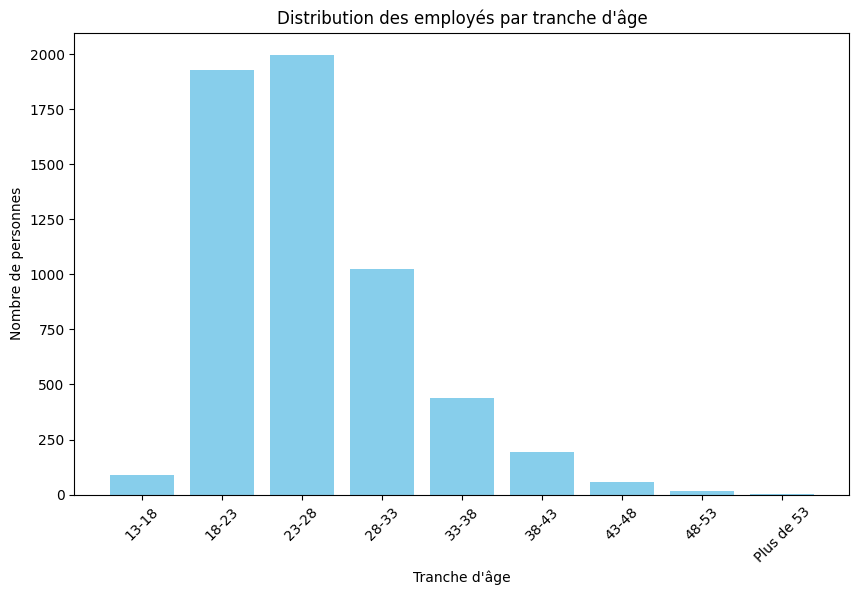

In [15]:
tranche_counts_pd = tranche_counts_pl.to_pandas()

plt.figure(figsize=(10, 6))
plt.bar(tranche_counts_pd['tranche_age_engagement'], tranche_counts_pd['effectif'], color='skyblue')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de personnes')
plt.title('Distribution des employés par tranche d\'âge')
plt.xticks(rotation=45)  # Incliner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()

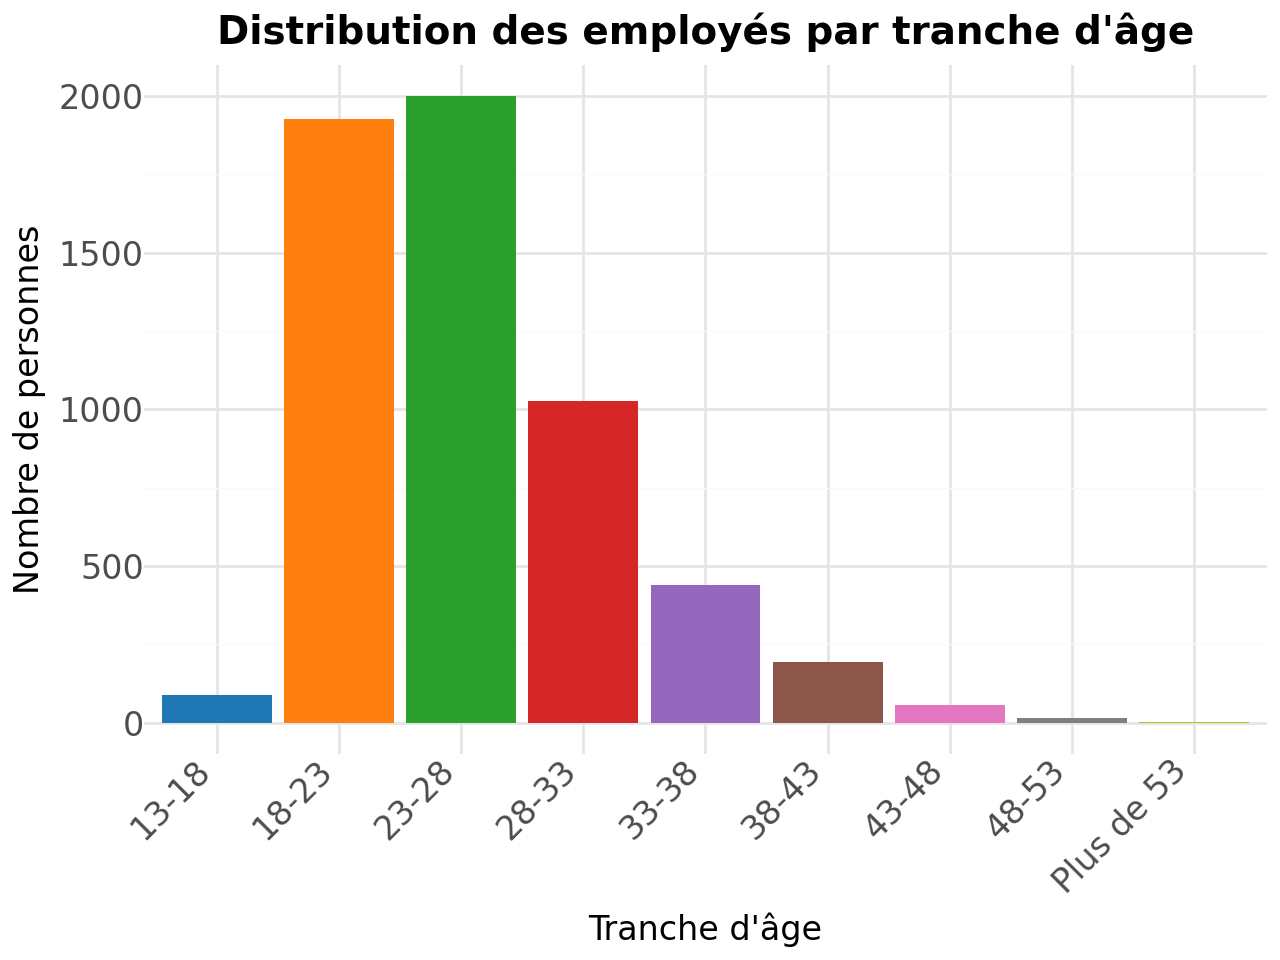

In [16]:
# Conversion du DataFrame Polars à Pandas
tranche_counts_pd = tranche_counts_pl.to_pandas()

plot = (
    ggplot(tranche_counts_pd, aes(x='tranche_age_engagement', y='effectif', fill='tranche_age_engagement'))
    + geom_bar(stat='identity', show_legend=False)  # On désactive la légende ici pour simplifier
    + scale_fill_manual(values=[
        '#1f77b4',  # bleu
        '#ff7f0e',  # orange
        '#2ca02c',  # vert
        '#d62728',  # rouge
        '#9467bd',  # violet
        '#8c564b',  # brun
        '#e377c2',  # rose
        '#7f7f7f',  # gris
        '#bcbd22'   # jaune-vert
    ])
    + labs(
        title='Distribution des employés par tranche d\'âge',
        x='Tranche d\'âge',
        y='Nombre de personnes'
    )
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        text=element_text(size=12),
        plot_title=element_text(weight='bold', size=14)
    )
)

plot

In [17]:
print(data_pl_new.select(
    pl.col('age_engagement'),
    pl.col('SALAIRE PERS'),
    pl.col('ENFANT')
).describe())

shape: (9, 4)
┌────────────┬────────────────┬──────────────┬──────────┐
│ statistic  ┆ age_engagement ┆ SALAIRE PERS ┆ ENFANT   │
│ ---        ┆ ---            ┆ ---          ┆ ---      │
│ str        ┆ f64            ┆ f64          ┆ f64      │
╞════════════╪════════════════╪══════════════╪══════════╡
│ count      ┆ 5744.0         ┆ 5744.0       ┆ 5744.0   │
│ null_count ┆ 0.0            ┆ 0.0          ┆ 0.0      │
│ mean       ┆ 25.584436      ┆ 25926.253361 ┆ 2.184018 │
│ std        ┆ 5.77386        ┆ 23616.887196 ┆ 2.524423 │
│ min        ┆ 13.0           ┆ 4705.46265   ┆ 0.0      │
│ 25%        ┆ 21.0           ┆ 5180.02077   ┆ 0.0      │
│ 50%        ┆ 24.0           ┆ 5352.96077   ┆ 1.0      │
│ 75%        ┆ 29.0           ┆ 49967.96363  ┆ 4.0      │
│ max        ┆ 55.0           ┆ 74226.169    ┆ 16.0     │
└────────────┴────────────────┴──────────────┴──────────┘


In [18]:
data_pl_new.filter(pl.col('age_engagement') < 16).height

5

In [19]:
# Filtrer les données où age_engagement est entre 13 et 18
filtered_data = data_pl_new.filter((pl.col('age_engagement') >= 13) & (pl.col('age_engagement') < 18))

# Obtenir la hauteur (nombre de lignes) du DataFrame filtré
filtered_height = filtered_data.height

print(filtered_height)


88


In [20]:
# Compter le nombre de personnes dont l'âge est supérieur à 29
data_pl_new.filter(pl.col('age_engagement') > 50).height

4

In [21]:
data_pd[['CATEGORIE']].value_counts()

CATEGORIE
EXE          3203
M&C          2541
Name: count, dtype: int64

In [22]:
3203/(3203+2541)

0.557625348189415

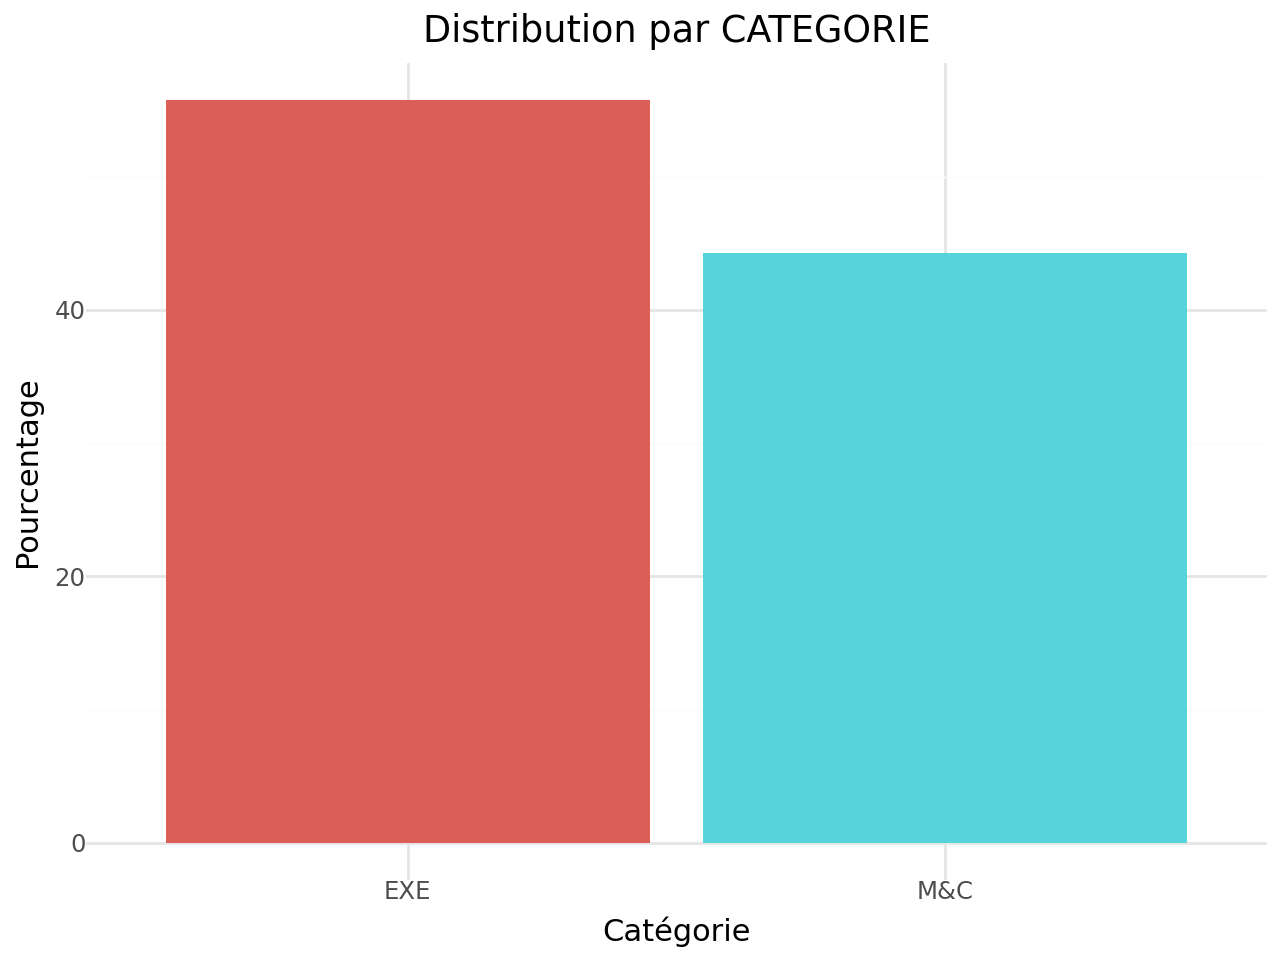

In [23]:
categorie_counts = data_pd[['CATEGORIE']].value_counts().reset_index()
categorie_counts.columns = ['CATEGORIE', 'count']

# Calcul des pourcentages
total_count = categorie_counts['count'].sum()
categorie_counts['percentage'] = (categorie_counts['count'] / total_count) * 100

(ggplot(categorie_counts, aes(x='CATEGORIE', y='percentage', fill='CATEGORIE'))
+ geom_bar(stat='identity', show_legend=False)
+ labs(
    title='Distribution par CATEGORIE',
    x='Catégorie',
    y='Pourcentage'
)
+ theme_minimal()
)

In [24]:
data_pd[['INDEPOUSE']].value_counts()

INDEPOUSE
1            4594
0             940
Name: count, dtype: int64

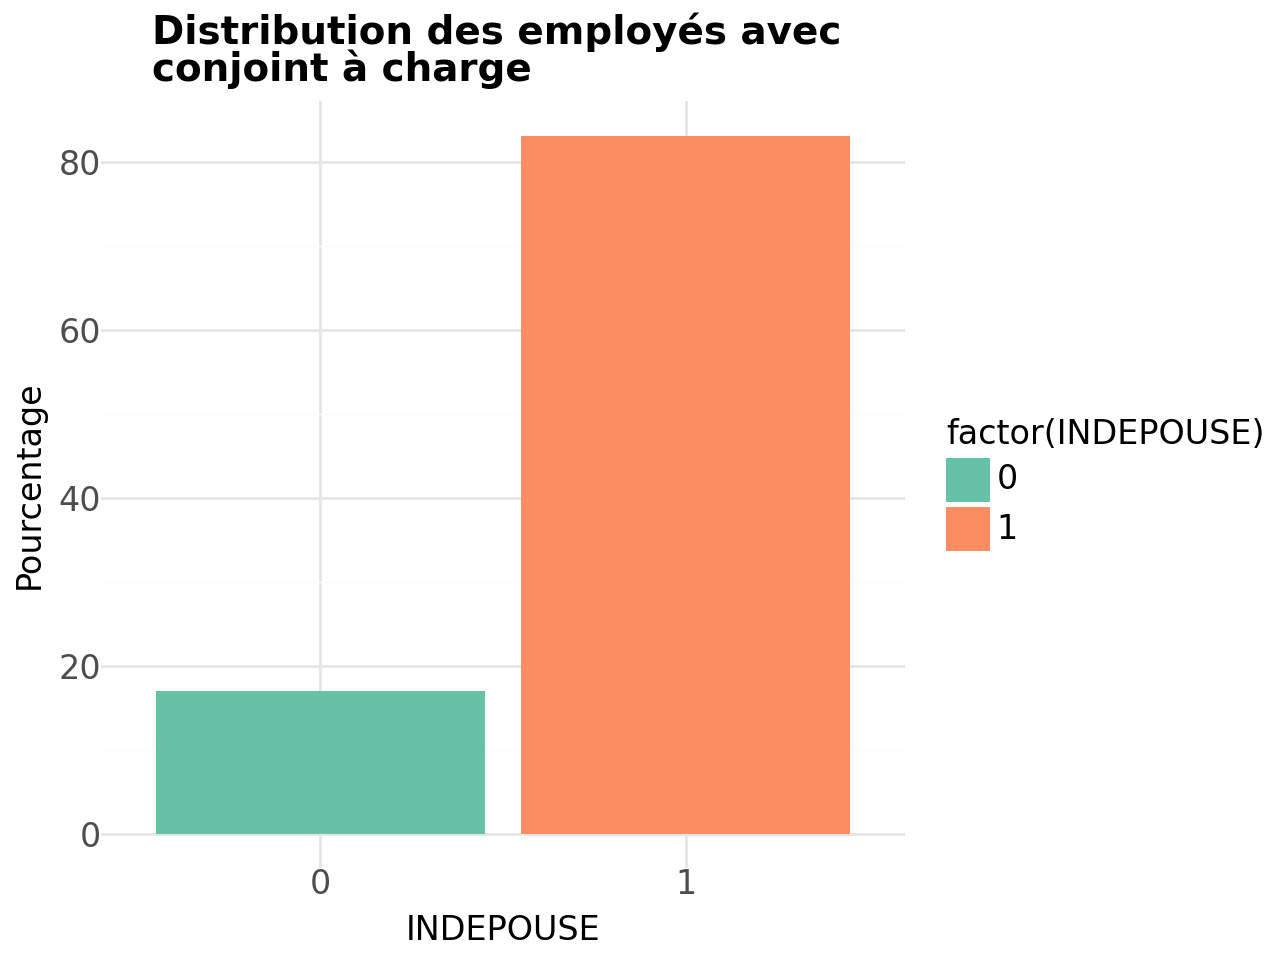

In [31]:
indepouse_counts = data_pd[['INDEPOUSE']].value_counts().reset_index()
indepouse_counts.columns = ['INDEPOUSE', 'count']

# Calcul des pourcentages
total_count = indepouse_counts['count'].sum()
indepouse_counts['percentage'] = (indepouse_counts['count'] / total_count) * 100

(
    ggplot(indepouse_counts, aes(x='INDEPOUSE', y='percentage', fill='factor(INDEPOUSE)'))
    + geom_bar(stat='identity')
    + scale_fill_manual(values=['#66c2a5', '#fc8d62'])  # Palette de couleurs attrayantes
    + labs(
        title='Distribution des employés avec \nconjoint à charge',
        x='INDEPOUSE',
        y='Pourcentage'
    )
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=0, hjust=0.5),
        text=element_text(size=12),
        plot_title=element_text(weight='bold', size=14)
    )
)

In [32]:
data_pd['ETATCIVIL'].value_counts()

ETATCIVIL
4    4547
0     908
A      87
E      66
B      32
1      21
D      10
2       3
3       2
C       2
Name: count, dtype: int64

In [33]:
data_pd['SEXE'].value_counts()

SEXE
M    5090
F     654
Name: count, dtype: int64

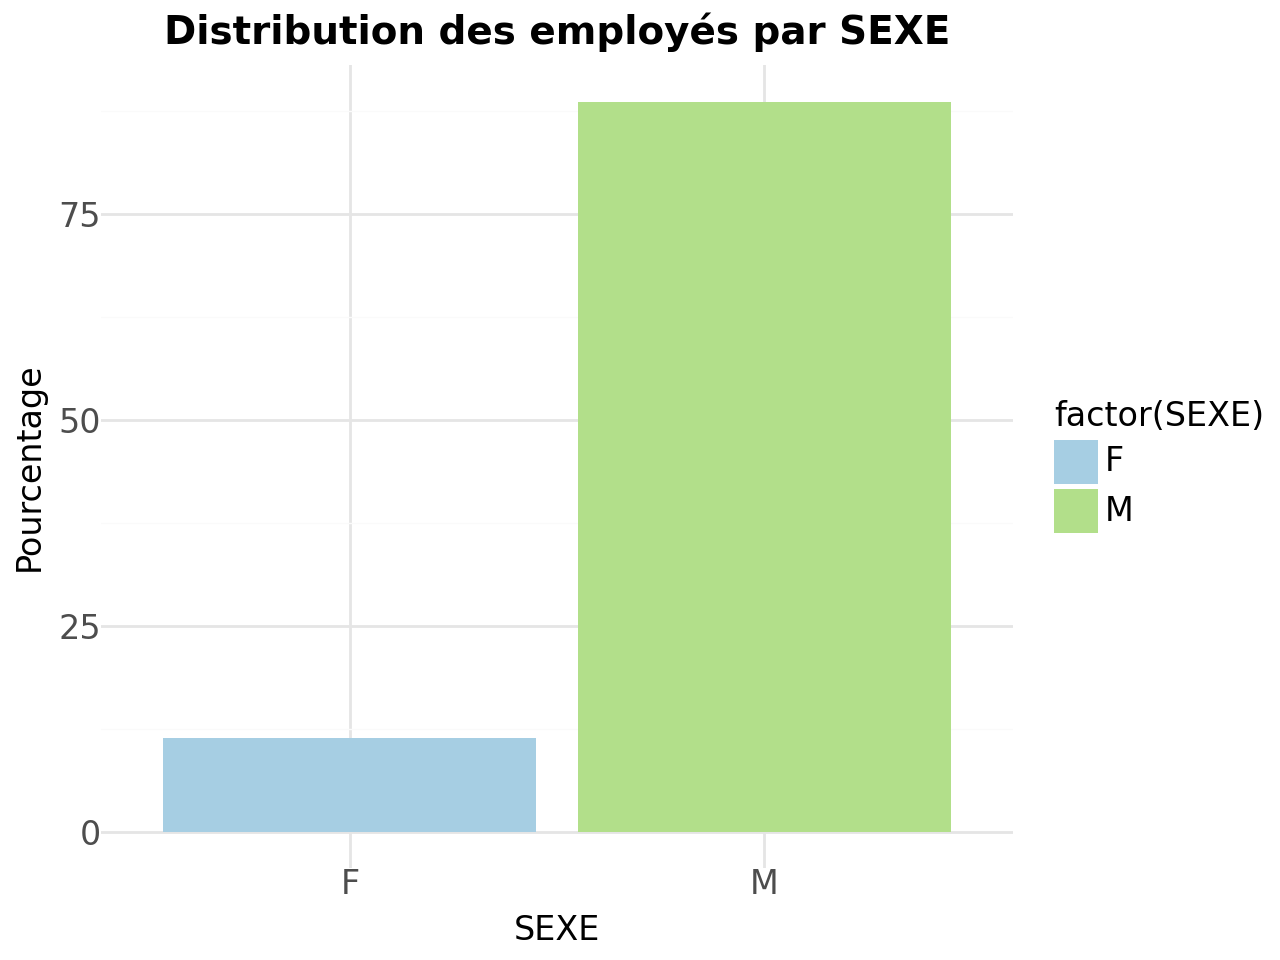

In [34]:
# Conversion des données en DataFrame
sexe_counts = data_pd['SEXE'].value_counts().reset_index()
sexe_counts.columns = ['SEXE', 'count']

# Calcul des pourcentages
total_count = sexe_counts['count'].sum()
sexe_counts['percentage'] = (sexe_counts['count'] / total_count) * 100

(
    ggplot(sexe_counts, aes(x='SEXE', y='percentage', fill='factor(SEXE)'))
    + geom_bar(stat='identity')
    + scale_fill_manual(values=['#a6cee3', '#b2df8a'])  # Palette de couleurs attrayantes
    + labs(
        title='Distribution des employés par SEXE',
        x='SEXE',
        y='Pourcentage'
    )
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=0, hjust=0.5),
        text=element_text(size=12),
        plot_title=element_text(weight='bold', size=14)
    )
)

In [35]:
print(data_pd['CITE'].unique())

['06' '05' '01' '02' '08' '07' '12' '04' '03' '09' '10' '14' '15' '13'
 '16' '11' 'AA']


In [36]:
data_pd['CITE'].value_counts()

CITE
01    2338
02     608
12     380
07     375
06     336
10     319
14     245
09     212
03     184
05     171
16     151
13     103
08     103
04      90
15      87
11      41
AA       1
Name: count, dtype: int64

In [37]:
data_pd[['GRADE']].value_counts()

GRADE
69       566
49       565
13       544
89       486
14       419
        ... 
64         1
73         1
95         1
91         1
94         1
Name: count, Length: 71, dtype: int64

### Analyse bivariée

#### Categorie vs Sexe

In [38]:
data_pd = data_pl_new.to_pandas()

# Créer un tableau de contingence avec Pandas
contingency_table = pd.crosstab(data_pd['CATEGORIE'], data_pd['SEXE'])

# Afficher le tableau de contingence
print(contingency_table)

SEXE         F     M
CATEGORIE           
EXE        207  2996
M&C        447  2094


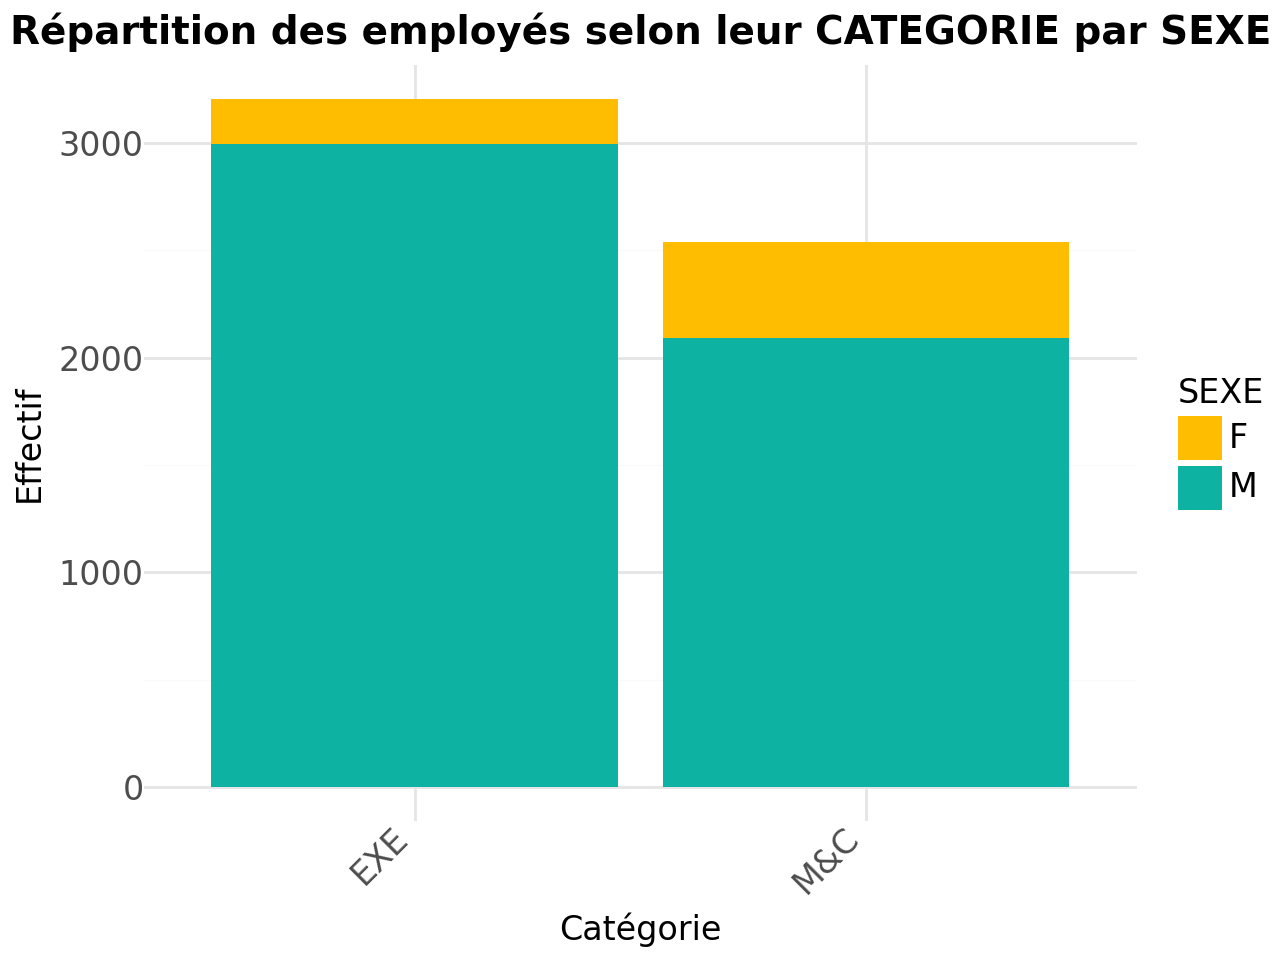

In [39]:
contingency_table = pd.crosstab(data_pd['CATEGORIE'], data_pd['SEXE']).reset_index()
contingency_table = pd.melt(contingency_table, id_vars='CATEGORIE', var_name='SEXE', value_name='count')

# Création du graphique sans pourcentages
(
    ggplot(contingency_table, aes(x='CATEGORIE', y='count', fill='SEXE'))
    + geom_bar(stat='identity', position='stack')
    + scale_fill_manual(values=['#febd01', '#0db2a2'])
    + labs(
        title='Répartition des employés selon leur CATEGORIE par SEXE',
        x='Catégorie',
        y='Effectif',
        fill='SEXE'
    )
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        text=element_text(size=12),
        plot_title=element_text(weight='bold', size=14)
    )
)

In [41]:
# Tableau de contingence entre CATEGORIE et SEXE
contingency_table = pd.crosstab(data_pd['CATEGORIE'], data_pd['SEXE'])
print("Tableau de contingence :\n", contingency_table)

Tableau de contingence :
 SEXE         F     M
CATEGORIE           
EXE        207  2996
M&C        447  2094


In [42]:
# Calcul des proportions par catégorie (en normalisant par ligne)
contingency_table_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("Proportions par catégorie :\n", contingency_table_proportions.round(2))


Proportions par catégorie :
 SEXE          F     M
CATEGORIE            
EXE        0.06  0.94
M&C        0.18  0.82


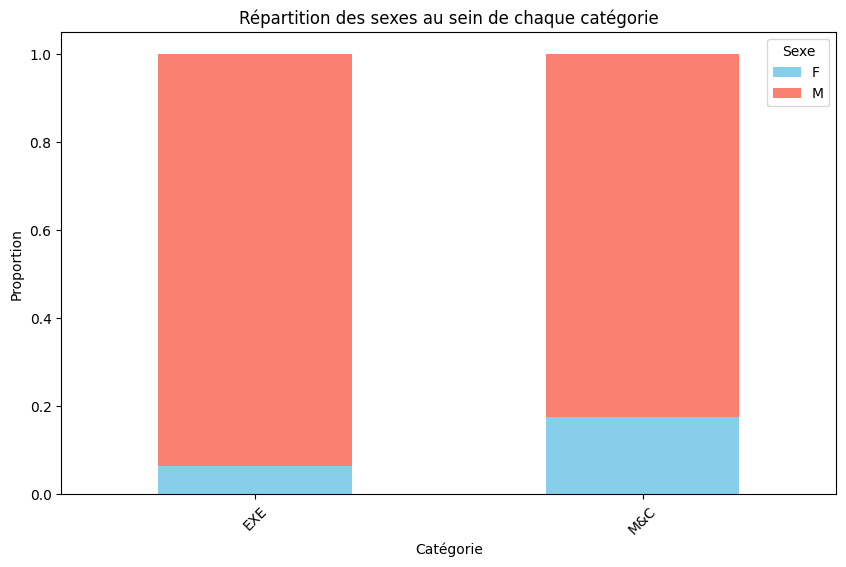

In [43]:
contingency_table_proportions.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], figsize=(10, 6))

plt.xlabel("Catégorie")
plt.ylabel("Proportion")
plt.title("Répartition des sexes au sein de chaque catégorie")
plt.legend(title="Sexe", loc="upper right")
plt.xticks(rotation=45)

plt.show()


#### Categorie vs salaire

In [44]:
#statistiques descriptives des salaires pour chaque catégorie
statistiques_salaire = data_pd.groupby("CATEGORIE")["SALAIRE PERS"].describe()
print(statistiques_salaire)

            count          mean          std          min          25%  \
CATEGORIE                                                                
EXE        3203.0   5187.316031   130.651722   4705.46265   5117.14077   
M&C        2541.0  52068.251106  5919.226805  42198.99565  46799.62942   

                   50%          75%          max  
CATEGORIE                                         
EXE         5197.52077   5278.67077   5522.96077  
M&C        50670.68815  54851.62861  74226.16900  


In [45]:
statistiques_salaire = data_pl.group_by("CATEGORIE").agg([
    pl.col("SALAIRE PERS").count().alias("count"),
    pl.col("SALAIRE PERS").mean().alias("mean"),
    pl.col("SALAIRE PERS").std().alias("std"),
    pl.col("SALAIRE PERS").min().alias("min"),
    pl.col("SALAIRE PERS").quantile(0.25).alias("25%"),
    pl.col("SALAIRE PERS").median().alias("50%"),
    pl.col("SALAIRE PERS").quantile(0.75).alias("75%"),
    pl.col("SALAIRE PERS").max().alias("max")
])

print(statistiques_salaire)

shape: (2, 9)
┌───────────┬───────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ CATEGORIE ┆ count ┆ mean       ┆ std        ┆ … ┆ 25%        ┆ 50%       ┆ 75%       ┆ max       │
│ ---       ┆ ---   ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│ str       ┆ u32   ┆ f64        ┆ f64        ┆   ┆ f64        ┆ f64       ┆ f64       ┆ f64       │
╞═══════════╪═══════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ EXE       ┆ 3203  ┆ 5187.31603 ┆ 130.651722 ┆ … ┆ 5117.18077 ┆ 5197.5207 ┆ 5278.8207 ┆ 5522.9607 │
│           ┆       ┆ 1          ┆            ┆   ┆            ┆ 7         ┆ 7         ┆ 7         │
│ M&C       ┆ 2541  ┆ 52068.2511 ┆ 5919.22680 ┆ … ┆ 46799.6294 ┆ 50670.688 ┆ 54851.628 ┆ 74226.169 │
│           ┆       ┆ 06         ┆ 5          ┆   ┆ 2          ┆ 15        ┆ 61        ┆           │
└───────────┴───────┴────────────┴────────────┴───┴────────────┴───────────┴─

C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\408106011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



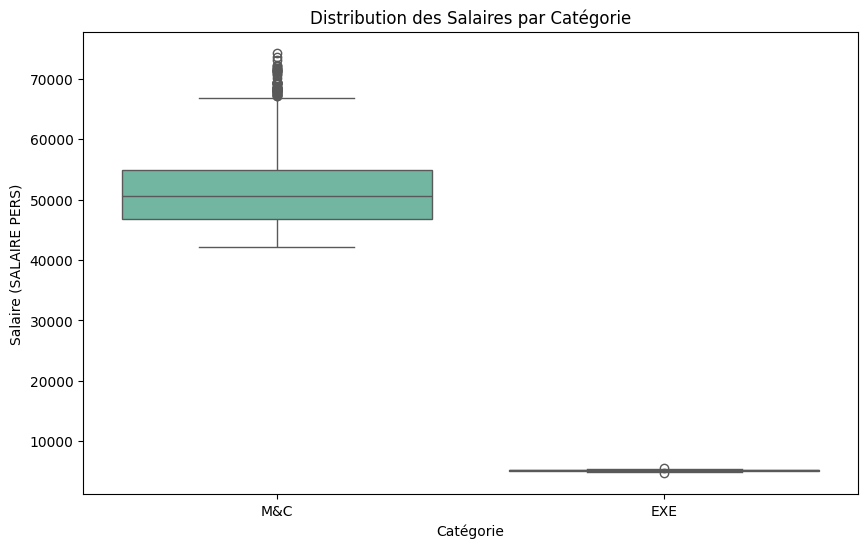

In [46]:
# Visualisation avec un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_pd, x="CATEGORIE", y="SALAIRE PERS", palette="Set2")

# Ajout des labels et un titre
plt.title("Distribution des Salaires par Catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Salaire (SALAIRE PERS)")

plt.show()

C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\431817117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\431817117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



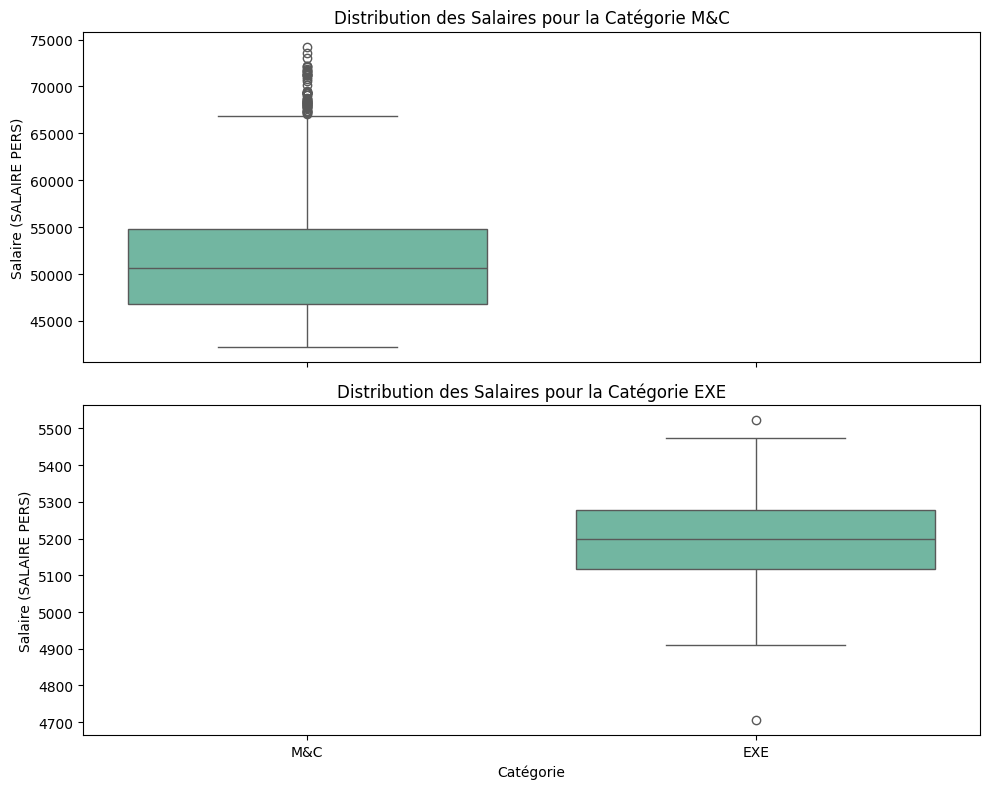

In [47]:
categories = data_pd["CATEGORIE"].unique()

# sous-graphiques (un pour chaque catégorie)
fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 4), sharex=True)

# boxplot pour chaque sous-graphe
for i, categorie in enumerate(categories):
    sns.boxplot(
        data=data_pd[data_pd["CATEGORIE"] == categorie], 
        x="CATEGORIE", 
        y="SALAIRE PERS", 
        ax=axes[i], 
        palette="Set2"
    )
    
    # Titre pour chaque sous-graphique
    axes[i].set_title(f"Distribution des Salaires pour la Catégorie {categorie}")
    axes[i].set_xlabel("Catégorie")
    axes[i].set_ylabel("Salaire (SALAIRE PERS)")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

plt.show()

#### Categorie vs Nombre d'enfant

In [48]:
#statistiques descriptives des salaires pour chaque catégorie
statistiques_salaire = data_pd.groupby("CATEGORIE")["ENFANT"].describe()
print(statistiques_salaire)

            count      mean       std  min  25%  50%  75%   max
CATEGORIE                                                      
EXE        3203.0  2.451452  2.665344  0.0  0.0  2.0  4.0  16.0
M&C        2541.0  1.846911  2.291155  0.0  0.0  1.0  3.0  14.0


In [49]:
result = (
    data_pl_new.group_by('CATEGORIE')
    .agg([
        pl.col('ENFANT').mean().alias('mean'),
        pl.col('ENFANT').std().alias('std'),
        pl.col('ENFANT').min().alias('min'),
        pl.col('ENFANT').quantile(0.25).alias('25%'),
        pl.col('ENFANT').median().alias('50%'),  # Médiane
        pl.col('ENFANT').quantile(0.75).alias('75%'),
        pl.col('ENFANT').max().alias('max'),
        pl.col('ENFANT').sum().alias('sum'),
        pl.col('ENFANT').count().alias('n')
    ])
)

print(result)

shape: (2, 10)
┌───────────┬──────────┬──────────┬─────┬───┬─────┬─────┬──────┬──────┐
│ CATEGORIE ┆ mean     ┆ std      ┆ min ┆ … ┆ 75% ┆ max ┆ sum  ┆ n    │
│ ---       ┆ ---      ┆ ---      ┆ --- ┆   ┆ --- ┆ --- ┆ ---  ┆ ---  │
│ str       ┆ f64      ┆ f64      ┆ i64 ┆   ┆ f64 ┆ i64 ┆ i64  ┆ u32  │
╞═══════════╪══════════╪══════════╪═════╪═══╪═════╪═════╪══════╪══════╡
│ EXE       ┆ 2.451452 ┆ 2.665344 ┆ 0   ┆ … ┆ 4.0 ┆ 16  ┆ 7852 ┆ 3203 │
│ M&C       ┆ 1.846911 ┆ 2.291155 ┆ 0   ┆ … ┆ 3.0 ┆ 14  ┆ 4693 ┆ 2541 │
└───────────┴──────────┴──────────┴─────┴───┴─────┴─────┴──────┴──────┘


In [50]:
contingency_table = (
    data_pl_new.group_by(['CATEGORIE', 'INDEPOUSE'])
    .count()
    .pivot(
        values='count', 
        index='CATEGORIE', 
        columns='INDEPOUSE'
    )
    .fill_null(0)  # Remplir les valeurs nulles avec 0
)

print(contingency_table)

shape: (2, 4)
┌───────────┬──────┬──────┬─────┐
│ CATEGORIE ┆ null ┆ 1    ┆ 0   │
│ ---       ┆ ---  ┆ ---  ┆ --- │
│ str       ┆ u32  ┆ u32  ┆ u32 │
╞═══════════╪══════╪══════╪═════╡
│ M&C       ┆ 22   ┆ 1956 ┆ 563 │
│ EXE       ┆ 188  ┆ 2638 ┆ 377 │
└───────────┴──────┴──────┴─────┘


C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\637639986.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\637639986.py:4: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.


C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\3816087196.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
C:\Users\Pinto Katende\AppData\Local\Temp\ipykernel_3576\3816087196.py:5: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.


shape: (2, 6)
┌───────────┬──────┬─────┬──────┬─────────────┬─────────────┐
│ CATEGORIE ┆ 1    ┆ 0   ┆ null ┆ INDEPOUSE_0 ┆ INDEPOUSE_1 │
│ ---       ┆ ---  ┆ --- ┆ ---  ┆ ---         ┆ ---         │
│ str       ┆ u32  ┆ u32 ┆ u32  ┆ f64         ┆ f64         │
╞═══════════╪══════╪═════╪══════╪═════════════╪═════════════╡
│ EXE       ┆ 2638 ┆ 377 ┆ 188  ┆ 12.504146   ┆ 87.495854   │
│ M&C       ┆ 1956 ┆ 563 ┆ 22   ┆ 22.350139   ┆ 77.649861   │
└───────────┴──────┴─────┴──────┴─────────────┴─────────────┘


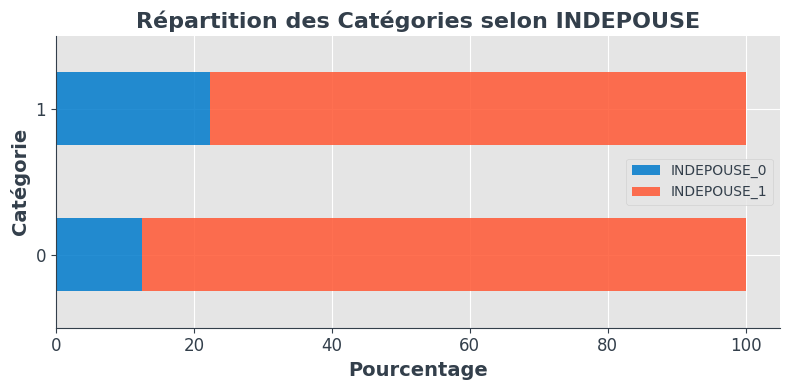

In [ ]:
# Création de la table de contingence avec group_by et pivot
contingency_table = (
    data_pl_new.group_by(['CATEGORIE', 'INDEPOUSE'])
    .agg(pl.count().alias('count'))
    .pivot(
        values='count', 
        index='CATEGORIE', 
        columns='INDEPOUSE'
    )
    .fill_null(0)  # Remplir les valeurs nulles avec 0
)

# Calcul des pourcentages par rapport à la somme de chaque ligne dans Polars
contingency_table_percent = contingency_table.with_columns([
    ((pl.col('0') / (pl.col('0') + pl.col('1'))) * 100).alias('INDEPOUSE_0'),
    ((pl.col('1') / (pl.col('0') + pl.col('1'))) * 100).alias('INDEPOUSE_1')
])

# Configuration des styles pour le graphique
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'  
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'
plt.rcParams['text.color'] = '#333F4B'

# Création du graphique avec les pourcentages
contingency_table_percent[['CATEGORIE', 'INDEPOUSE_0', 'INDEPOUSE_1']].to_pandas().plot(kind='barh', stacked=True, figsize=(8, 4), color=['#007ACC', '#FF5733'], alpha=0.85)

# Configuration des axes et des étiquettes
plt.title('Répartition des Catégories selon INDEPOUSE', fontsize=16, weight='bold', color='#333F4B')
plt.xlabel('Pourcentage', fontsize=14, weight='bold', color='#333F4B')
plt.ylabel('Catégorie', fontsize=14, weight='bold', color='#333F4B')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Suppression des spines inutiles
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Affichage du graphique
plt.tight_layout()
plt.show()


In [57]:
pd.crosstab(data_pd['CATEGORIE'], data_pd['INDEPOUSE'])

INDEPOUSE,0,1
CATEGORIE,,
EXE,377,2638
M&C,563,1956


On sait voir ici que la cotation est reservée uniquement aux employés qui trouvent dans la catégorie **M&C**, et non dans **EXE**

In [58]:
data_pd[['SALAIRE PERS', 'ENFANT', 'TRP', 'LGT', 'SSANTE', 'ENERGIE', 'IFT', 'IDP', 'IPM', 'age_engagement']].corr()

,SALAIRE PERS,ENFANT,TRP,LGT,SSANTE,ENERGIE,IFT,IDP,IPM,age_engagement
SALAIRE PERS,1.000000,-0.134560,0.995977,0.887937,0.991825,0.986002,0.993768,0.990134,0.986002,-0.173169
ENFANT,-0.134560,1.000000,-0.124745,-0.128138,-0.131530,-0.118951,-0.127688,-0.120534,-0.118951,0.091870
TRP,0.995977,-0.124745,1.000000,0.879409,0.989648,0.991614,0.995351,0.994991,0.991614,-0.165839
LGT,0.887937,-0.128138,0.879409,1.000000,0.926926,0.827972,0.914047,0.843639,0.827972,-0.141560
SSANTE,0.991825,-0.131530,0.989648,0.926926,1.000000,0.966526,0.997198,0.974008,0.966526,-0.163492
ENERGIE,0.986002,-0.118951,0.991614,0.827972,0.966526,1.000000,0.975758,0.999490,1.000000,-0.176135
IFT,0.993768,-0.127688,0.995351,0.914047,0.997198,0.975758,1.000000,0.982078,0.975758,-0.160424
IDP,0.990134,-0.120534,0.994991,0.843639,0.974008,0.999490,0.982078,1.000000,0.999490,-0.175056
IPM,0.986002,-0.118951,0.991614,0.827972,0.966526,1.000000,0.975758,0.999490,1.000000,-0.176135
age_engagement,-0.173169,0.091870,-0.165839,-0.141560,-0.163492,-0.176135,-0.160424,-0.175056,-0.176135,1.000000


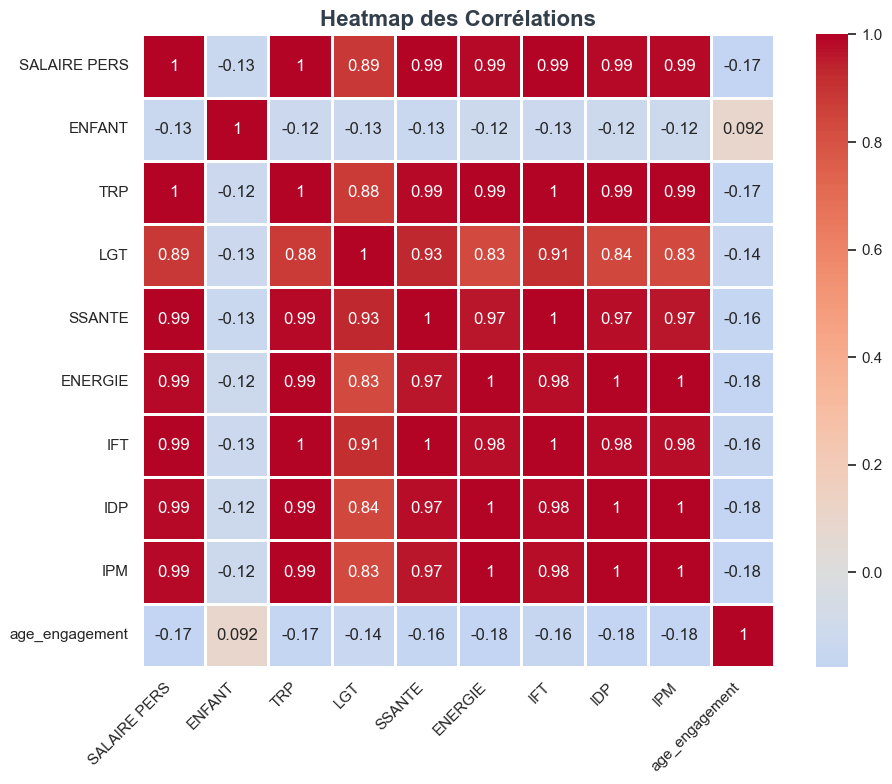

In [59]:
# Calcul de la matrice de corrélation
corr_matrix = data_pd[['SALAIRE PERS', 'ENFANT', 'TRP', 'LGT', 'SSANTE', 'ENERGIE', 'IFT', 'IDP', 'IPM', 'age_engagement']].corr()

# Configuration du style et de la taille du graphique
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Création de la heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,  # Affiche les valeurs numériques sur la carte
    cmap='coolwarm',  # Couleurs attrayantes pour les valeurs positives et négatives
    center=0,  # Centrer autour de 0 pour mieux visualiser les corrélations positives et négatives
    linewidths=1,
    square=True  # Carré pour chaque cellule
)

plt.title("Heatmap des Corrélations", fontsize=16, weight='bold', color='#333F4B')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

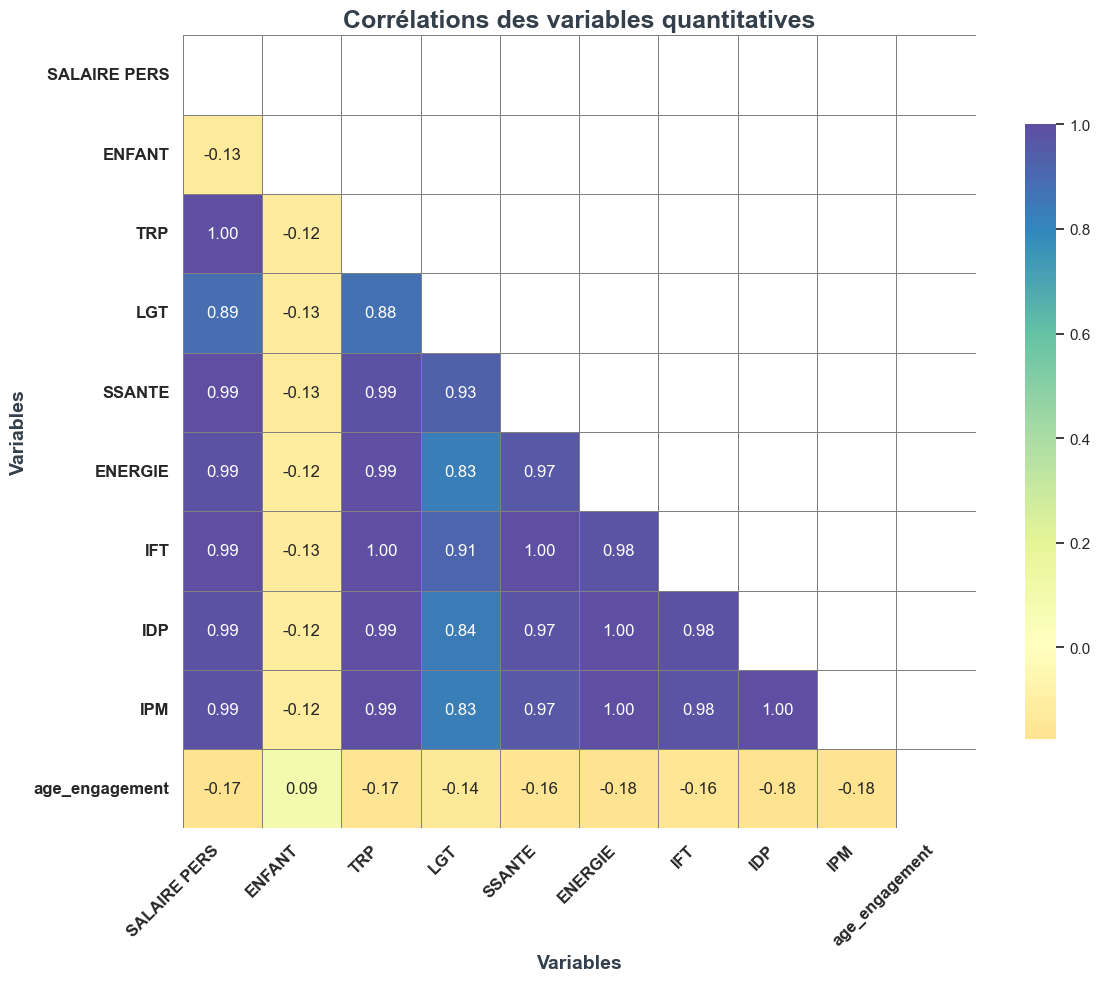

In [60]:
# Calcul de la matrice de corrélation
corr_matrix = data_pd[['SALAIRE PERS', 'ENFANT', 'TRP', 'LGT', 'SSANTE', 'ENERGIE', 'IFT', 'IDP', 'IPM', 'age_engagement']].corr()

# Masque pour afficher uniquement la moitié supérieure de la matrice
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création d'une figure
plt.figure(figsize=(12, 10))
sns.set_theme(style="white")

# Création de la heatmap avec un design plus sophistiqué
sns.heatmap(
    corr_matrix,
    mask=mask,  # Application du masque
    annot=True,  # Affiche les valeurs
    fmt=".2f",  # Format des valeurs
    cmap='Spectral',  # Palette de couleurs attrayante
    center=0,  # Centre la palette autour de 0
    cbar_kws={'shrink': 0.75, 'aspect': 20},  # Configuration de la barre de couleur
    linewidths=0.5,  # Espacement entre les cellules
    linecolor='gray',  # Couleur des lignes
    square=True  # Format carré pour chaque cellule
)

# Personnalisation des axes et du titre
plt.title("Corrélations des variables quantitatives", fontsize=18, weight='bold', color='#333F4B')
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.xlabel('Variables', fontsize=14, weight='bold', color='#333F4B')
plt.ylabel('Variables', fontsize=14, weight='bold', color='#333F4B')

# Affichage du graphique
plt.tight_layout()
plt.show()


In [61]:
import scipy.stats as ss


contingency_table = pd.crosstab(index=[data_pd['CATEGORIE'], data_pd['SEXE']], columns=data_pd['INDEPOUSE'])
print(contingency_table)

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

# Calcul de Cramér's V
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V: {cramers_v_value}")


INDEPOUSE         0     1
CATEGORIE SEXE           
EXE       F     187     3
          M     190  2635
M&C       F     425     7
          M     138  1949
Cramér's V: 0.7711630823181218


In [68]:
# Étape 1: Créer le tableau de contingence
contingency_table = pd.crosstab(index=[data_pd['CATEGORIE'], data_pd['SEXE']], columns=data_pd['INDEPOUSE'])

# Étape 2: Afficher le tableau de contingence avec un design amélioré
print(Fore.MAGENTA + Style.BRIGHT + "### Tableau de Contingence ###")
print(Style.RESET_ALL)
# Format de tableau plus esthétique avec bordures et alignement
print(Fore.CYAN + tabulate(contingency_table, headers='keys', tablefmt='fancy_grid', showindex=True, stralign="center"))
print(Style.RESET_ALL)
print(Fore.MAGENTA + Style.BRIGHT + "-"*40 + Style.RESET_ALL)  # Séparateur visuel

# Étape 3: Définir la fonction pour calculer le Cramér's V
def cramers_v(confusion_matrix):
    """
    Calcule la statistique de Cramér's V pour mesurer l'association entre les variables catégorielles.
    
    :param confusion_matrix: Un tableau de contingence
    :return: La valeur de Cramér's V (entre 0 et 1)
    """
    # Statistique du test du chi-carré et nombre total d'observations
    chi2_statistic = ss.chi2_contingency(confusion_matrix)[0]
    total_obs = confusion_matrix.sum().sum()

    # Calcul du phi-squared
    phi2 = chi2_statistic / total_obs

    # Nombre de lignes et de colonnes dans le tableau de contingence
    rows, cols = confusion_matrix.shape

    # Appliquer les corrections pour phi-squared
    phi2_corrected = max(0, phi2 - ((cols - 1) * (rows - 1)) / (total_obs - 1))
    rows_corr = rows - ((rows - 1) ** 2) / (total_obs - 1)
    cols_corr = cols - ((cols - 1) ** 2) / (total_obs - 1)

    # Retourner la racine carrée de la valeur corrigée de phi-squared
    return np.sqrt(phi2_corrected / min((cols_corr - 1), (rows_corr - 1)))

# Étape 4: Calcul de Cramér's V
cramers_v_value = cramers_v(contingency_table)

# Étape 5: Affichage du résultat avec un design plus moderne
print(Fore.GREEN + Style.BRIGHT + "\n### Résultat Cramér's V ###")
print(Fore.GREEN + "-"*40)  # Ligne de séparation
print(f"{Style.BRIGHT}Cramér's V: {cramers_v_value:.4f}{Style.RESET_ALL}")
print(Fore.GREEN + "-"*40)  # Ligne de séparation

# Interprétation de la valeur de Cramér's V avec une mise en valeur de la force de l'association
if cramers_v_value < 0.1:
    print(Fore.YELLOW + Style.BRIGHT + "Faible association entre les variables." + Style.RESET_ALL)
elif cramers_v_value < 0.3:
    print(Fore.CYAN + Style.BRIGHT + "Association modérée entre les variables." + Style.RESET_ALL)
else:
    print(Fore.RED + Style.BRIGHT + "Association forte entre les variables." + Style.RESET_ALL)

# Réinitialiser les styles à la fin
print(Fore.MAGENTA + "-"*40 + Style.RESET_ALL)  # Séparateur final
print(Style.RESET_ALL)


### Tableau de Contingence ###

╒══════════════╤═════╤══════╕
│              │   0 │    1 │
╞══════════════╪═════╪══════╡
│ ('EXE', 'F') │ 187 │    3 │
├──────────────┼─────┼──────┤
│ ('EXE', 'M') │ 190 │ 2635 │
├──────────────┼─────┼──────┤
│ ('M&C', 'F') │ 425 │    7 │
├──────────────┼─────┼──────┤
│ ('M&C', 'M') │ 138 │ 1949 │
╘══════════════╧═════╧══════╛

----------------------------------------

### Résultat Cramér's V ###
----------------------------------------
Cramér's V: 0.7712
----------------------------------------
Association forte entre les variables.
----------------------------------------



### Elaboration du modèle pour la prédiction des catégories

In [149]:
print(data_pl_new.columns)

['CATEGORIE', 'GRADE', 'DERNIER AVACEMENT EN GRADE', 'SALAIRE PERS', 'CITE', 'SEXE', 'ETATCIVIL', 'INDEPOUSE', 'ENFANT', 'COTATION', 'DATENAISSA', 'DATEENGAGE', 'TRP', 'LGT', 'SSANTE', 'ENERGIE', 'IFT', 'IDP', 'IPM', 'age_engagement', 'tranche_age_engagement']


In [150]:
#### Sélection des variables pour le modèle
data_model = data_pl_new.select(
    pl.all().exclude(['DERNIER AVACEMENT EN GRADE', 'COTATION', 'DATENAISSA', 'DATEENGAGE', 'tranche_age_engagement', 'GRADE','ETATCIVIL' ])
)

print(data_model)

shape: (5_744, 14)
┌───────────┬──────────────┬──────┬──────┬───┬──────────┬───────────┬────────┬────────────────┐
│ CATEGORIE ┆ SALAIRE PERS ┆ CITE ┆ SEXE ┆ … ┆ IFT      ┆ IDP       ┆ IPM    ┆ age_engagement │
│ ---       ┆ ---          ┆ ---  ┆ ---  ┆   ┆ ---      ┆ ---       ┆ ---    ┆ ---            │
│ str       ┆ f64          ┆ str  ┆ str  ┆   ┆ f64      ┆ f64       ┆ i64    ┆ i32            │
╞═══════════╪══════════════╪══════╪══════╪═══╪══════════╪═══════════╪════════╪════════════════╡
│ M&C       ┆ 47865.44225  ┆ 06   ┆ M    ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 18             │
│ M&C       ┆ 47652.18334  ┆ 05   ┆ M    ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 26             │
│ M&C       ┆ 47348.71096  ┆ 06   ┆ M    ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 27             │
│ M&C       ┆ 47115.68266  ┆ 01   ┆ M    ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 24             │
│ M&C       ┆ 47344.56758  ┆ 02   ┆ M    ┆ … ┆ 97837.51 ┆ 126115.18 ┆ 348500 ┆ 24             │
│ …         ┆ …      

In [151]:
data_model.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CATEGORIE       5744 non-null   object 
 1   SALAIRE PERS    5744 non-null   float64
 2   CITE            5744 non-null   object 
 3   SEXE            5744 non-null   object 
 4   INDEPOUSE       5534 non-null   object 
 5   ENFANT          5744 non-null   int64  
 6   TRP             5744 non-null   float64
 7   LGT             5744 non-null   float64
 8   SSANTE          5744 non-null   float64
 9   ENERGIE         5744 non-null   int64  
 10  IFT             5744 non-null   float64
 11  IDP             5744 non-null   float64
 12  IPM             5744 non-null   int64  
 13  age_engagement  5744 non-null   int32  
dtypes: float64(6), int32(1), int64(3), object(4)
memory usage: 605.9+ KB


In [152]:
# Convertir les données Polars en DataFrame Pandas pour la manipulation
df = data_model.to_pandas()

# Identifier les colonnes catégorielles
colonnes_categoricielles = ["CITE", "SEXE", "INDEPOUSE"]

# Appliquer un encodage LabelEncoder sur ces colonnes
label_encoders = {}
for col in colonnes_categoricielles:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encodage de la variable cible
df["CATEGORIE"] = LabelEncoder().fit_transform(df["CATEGORIE"])

# Séparer les données en X et y
X = df.drop(columns=["CATEGORIE"])
y = df["CATEGORIE"]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1149
   macro avg       1.00      1.00      1.00      1149
weighted avg       1.00      1.00      1.00      1149



#### Etudes des variables du modèle avec statsmodels

In [156]:
model = sm.Logit(y_train, X_train)
result = model.fit()

# Afficher le résumé du modèle
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              CATEGORIE   No. Observations:                 4595
Model:                          Logit   Df Residuals:                     4582
Method:                           MLE   Df Model:                           12
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        13:40:12   Log-Likelihood:            -1.0203e-12
converged:                      False   LL-Null:                       -3152.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SALAIRE PERS    1.884e-06    621.986   3.03e-09      1.000   -1219.070    1219.070
CITE            6.417e-05   2.24e+05   2.86e-10      

c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Per

Il y a un problème avec le modèèle, car il parvient à prédire complètement les données, ce qui peut être un signe d'une très forte
multi-colinéarité entre les variables.

##### Etude de la multiccolinéarité

In [158]:
# VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           feature            VIF
0     SALAIRE PERS     221.698094
1             CITE       1.078873
2             SEXE       1.746441
3        INDEPOUSE       1.702281
4           ENFANT       1.060799
5              TRP    2472.915463
6              LGT      20.045121
7           SSANTE     472.829447
8          ENERGIE  313247.777713
9              IFT    1813.738318
10             IDP   39994.592023
11             IPM   47944.429271
12  age_engagement       1.087536


In [162]:
vif = pl.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif)


shape: (13, 2)
┌────────────────┬───────────────┐
│ feature        ┆ VIF           │
│ ---            ┆ ---           │
│ str            ┆ f64           │
╞════════════════╪═══════════════╡
│ SALAIRE PERS   ┆ 221.698094    │
│ CITE           ┆ 1.078873      │
│ SEXE           ┆ 1.746441      │
│ INDEPOUSE      ┆ 1.702281      │
│ ENFANT         ┆ 1.060799      │
│ …              ┆ …             │
│ ENERGIE        ┆ 313247.777713 │
│ IFT            ┆ 1813.738318   │
│ IDP            ┆ 39994.592023  │
│ IPM            ┆ 47944.429271  │
│ age_engagement ┆ 1.087536      │
└────────────────┴───────────────┘


Les résultats du Variance Inflation Factor (VIF) montrent une forte multicolinéarité dans certaines variables, notamment ENERGIE, IDP, IPM, TRP, IFT, et SSANTE. Des VIF élevés (généralement au-dessus de 10) suggèrent que ces variables sont très corrélées avec d'autres, ce qui complique la convergence du modèle.

Pour garder la cohérence du modèle, il y a plusieurs solutions :

- **Supprimer les variables avec VIF très élevé** : Commencez par retirer les variables ayant les plus hauts VIF (ENERGIE, IDP, IPM, TRP, IFT, et SSANTE). Cela pourrait réduire la multicolinéarité et améliorer la convergence.

- **Tester la Modèle après Chaque Suppression** : Après chaque suppression, recalculer le VIF pour voir si les autres valeurs diminuent également.

- **Réexaminer les Variables Retenues** : Une fois les variables fortement colinéaires retirées, réestimer le modèle avec statsmodels

In [163]:
##### Nouvelles variables
data_model = data_pl_new.select(
    pl.all().exclude(['DERNIER AVACEMENT EN GRADE', 'COTATION', 'DATENAISSA', 'DATEENGAGE', 'tranche_age_engagement', 'GRADE','ETATCIVIL', 'ENERGIE', 'IDP', 'IPM', 'TRP', 'IFT', 'SSANTE' ])
)

print(data_model)

shape: (5_744, 8)
┌───────────┬──────────────┬──────┬──────┬───────────┬────────┬──────────┬────────────────┐
│ CATEGORIE ┆ SALAIRE PERS ┆ CITE ┆ SEXE ┆ INDEPOUSE ┆ ENFANT ┆ LGT      ┆ age_engagement │
│ ---       ┆ ---          ┆ ---  ┆ ---  ┆ ---       ┆ ---    ┆ ---      ┆ ---            │
│ str       ┆ f64          ┆ str  ┆ str  ┆ str       ┆ i64    ┆ f64      ┆ i32            │
╞═══════════╪══════════════╪══════╪══════╪═══════════╪════════╪══════════╪════════════════╡
│ M&C       ┆ 47865.44225  ┆ 06   ┆ M    ┆ 1         ┆ 0      ┆ 91627.03 ┆ 18             │
│ M&C       ┆ 47652.18334  ┆ 05   ┆ M    ┆ 0         ┆ 0      ┆ 91627.03 ┆ 26             │
│ M&C       ┆ 47348.71096  ┆ 06   ┆ M    ┆ 1         ┆ 0      ┆ 91627.03 ┆ 27             │
│ M&C       ┆ 47115.68266  ┆ 01   ┆ M    ┆ 1         ┆ 0      ┆ 91627.03 ┆ 24             │
│ M&C       ┆ 47344.56758  ┆ 02   ┆ M    ┆ 1         ┆ 1      ┆ 91627.03 ┆ 24             │
│ …         ┆ …            ┆ …    ┆ …    ┆ …         ┆ …      

In [ ]:
# Convertir les données Polars en DataFrame Pandas pour la manipulation
df = data_model.to_pandas()

# Identifier les colonnes catégorielles
colonnes_categoricielles = ["CITE", "SEXE", "INDEPOUSE"]

# Appliquer un encodage LabelEncoder sur ces colonnes
label_encoders = {}
for col in colonnes_categoricielles:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encodage de la variable cible
df["CATEGORIE"] = LabelEncoder().fit_transform(df["CATEGORIE"])

# Séparer les données en X et y
X = df.drop(columns=["CATEGORIE"])
y = df["CATEGORIE"]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1149
   macro avg       1.00      1.00      1.00      1149
weighted avg       1.00      1.00      1.00      1149



In [167]:
model = sm.Logit(y_train, X_train)
result = model.fit()

# Afficher le résumé du modèle
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              CATEGORIE   No. Observations:                 4595
Model:                          Logit   Df Residuals:                     4588
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        14:06:24   Log-Likelihood:            -2.6421e-12
converged:                      False   LL-Null:                       -3152.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SALAIRE PERS       0.0037    181.851   2.03e-05      1.000    -356.417     356.424
CITE              -0.1549   1.99e+05  -7.78e-07      

c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Pinto Katende\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Per

Le meme problème de multicolinéarité persite

In [168]:
vif = pl.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif)

shape: (7, 2)
┌────────────────┬───────────┐
│ feature        ┆ VIF       │
│ ---            ┆ ---       │
│ str            ┆ f64       │
╞════════════════╪═══════════╡
│ SALAIRE PERS   ┆ 10.222332 │
│ CITE           ┆ 1.831269  │
│ SEXE           ┆ 13.140461 │
│ INDEPOUSE      ┆ 8.712521  │
│ ENFANT         ┆ 1.818446  │
│ LGT            ┆ 26.521308 │
│ age_engagement ┆ 11.106914 │
└────────────────┴───────────┘


On essaye de supprimer une variable après une autre, dont le vif est supérieur à 10, puis on réexamine le modèle.

dans ce cas, on choisi LGT

In [169]:
##### Nouvelles variables
data_model = data_pl_new.select(
    pl.all().exclude(['DERNIER AVACEMENT EN GRADE', 'COTATION', 'DATENAISSA', 'DATEENGAGE', 'tranche_age_engagement', 'GRADE','ETATCIVIL', 'ENERGIE', 'IDP', 'IPM', 'TRP', 'IFT', 'SSANTE', 'LGT'])
)

print(data_model)

shape: (5_744, 7)
┌───────────┬──────────────┬──────┬──────┬───────────┬────────┬────────────────┐
│ CATEGORIE ┆ SALAIRE PERS ┆ CITE ┆ SEXE ┆ INDEPOUSE ┆ ENFANT ┆ age_engagement │
│ ---       ┆ ---          ┆ ---  ┆ ---  ┆ ---       ┆ ---    ┆ ---            │
│ str       ┆ f64          ┆ str  ┆ str  ┆ str       ┆ i64    ┆ i32            │
╞═══════════╪══════════════╪══════╪══════╪═══════════╪════════╪════════════════╡
│ M&C       ┆ 47865.44225  ┆ 06   ┆ M    ┆ 1         ┆ 0      ┆ 18             │
│ M&C       ┆ 47652.18334  ┆ 05   ┆ M    ┆ 0         ┆ 0      ┆ 26             │
│ M&C       ┆ 47348.71096  ┆ 06   ┆ M    ┆ 1         ┆ 0      ┆ 27             │
│ M&C       ┆ 47115.68266  ┆ 01   ┆ M    ┆ 1         ┆ 0      ┆ 24             │
│ M&C       ┆ 47344.56758  ┆ 02   ┆ M    ┆ 1         ┆ 1      ┆ 24             │
│ …         ┆ …            ┆ …    ┆ …    ┆ …         ┆ …      ┆ …              │
│ EXE       ┆ 4920.44077   ┆ 10   ┆ M    ┆ null      ┆ 0      ┆ 33             │
│ EXE     

In [170]:
# Convertir les données Polars en DataFrame Pandas pour la manipulation
df = data_model.to_pandas()

# Identifier les colonnes catégorielles
colonnes_categoricielles = ["CITE", "SEXE", "INDEPOUSE"]

# Appliquer un encodage LabelEncoder sur ces colonnes
label_encoders = {}
for col in colonnes_categoricielles:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encodage de la variable cible
df["CATEGORIE"] = LabelEncoder().fit_transform(df["CATEGORIE"])

# Séparer les données en X et y
X = df.drop(columns=["CATEGORIE"])
y = df["CATEGORIE"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       517

    accuracy                           1.00      1149
   macro avg       1.00      1.00      1.00      1149
weighted avg       1.00      1.00      1.00      1149



Même Problème

In [173]:
vif = pl.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif)

shape: (6, 2)
┌────────────────┬───────────┐
│ feature        ┆ VIF       │
│ ---            ┆ ---       │
│ str            ┆ f64       │
╞════════════════╪═══════════╡
│ SALAIRE PERS   ┆ 2.01234   │
│ CITE           ┆ 1.826764  │
│ SEXE           ┆ 12.691149 │
│ INDEPOUSE      ┆ 8.677319  │
│ ENFANT         ┆ 1.818404  │
│ age_engagement ┆ 7.648621  │
└────────────────┴───────────┘


Le problème est résolu en rétirant la variable **SALAIRE PERS**, car le modèle parvenait à prédire correctement la catégorie de l'employé sur base base des seuils de salaire.

In [192]:
##### Nouvelles variables
data_model = data_pl_new.select(
    pl.all().exclude(['DERNIER AVACEMENT EN GRADE', 'COTATION', 'DATENAISSA', 'DATEENGAGE', 'tranche_age_engagement', 'GRADE','ETATCIVIL', 'ENERGIE', 'IDP', 'IPM', 'TRP', 'IFT', 'SSANTE', 'LGT', 'SALAIRE PERS'])
)

print(data_model)

shape: (5_744, 6)
┌───────────┬──────┬──────┬───────────┬────────┬────────────────┐
│ CATEGORIE ┆ CITE ┆ SEXE ┆ INDEPOUSE ┆ ENFANT ┆ age_engagement │
│ ---       ┆ ---  ┆ ---  ┆ ---       ┆ ---    ┆ ---            │
│ str       ┆ str  ┆ str  ┆ str       ┆ i64    ┆ i32            │
╞═══════════╪══════╪══════╪═══════════╪════════╪════════════════╡
│ M&C       ┆ 06   ┆ M    ┆ 1         ┆ 0      ┆ 18             │
│ M&C       ┆ 05   ┆ M    ┆ 0         ┆ 0      ┆ 26             │
│ M&C       ┆ 06   ┆ M    ┆ 1         ┆ 0      ┆ 27             │
│ M&C       ┆ 01   ┆ M    ┆ 1         ┆ 0      ┆ 24             │
│ M&C       ┆ 02   ┆ M    ┆ 1         ┆ 1      ┆ 24             │
│ …         ┆ …    ┆ …    ┆ …         ┆ …      ┆ …              │
│ EXE       ┆ 10   ┆ M    ┆ null      ┆ 0      ┆ 33             │
│ EXE       ┆ 10   ┆ M    ┆ null      ┆ 0      ┆ 23             │
│ EXE       ┆ 10   ┆ M    ┆ null      ┆ 0      ┆ 26             │
│ EXE       ┆ 10   ┆ M    ┆ null      ┆ 0      ┆ 35       

In [193]:
# Convertir les données Polars en DataFrame Pandas pour la manipulation
df = data_model.to_pandas()

# Identifier les colonnes catégorielles
colonnes_categoricielles = ["CITE", "INDEPOUSE", 'SEXE']

# Appliquer un encodage LabelEncoder sur ces colonnes
label_encoders = {}
for col in colonnes_categoricielles:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encodage de la variable cible
df["CATEGORIE"] = LabelEncoder().fit_transform(df["CATEGORIE"])

# Séparer les données en X et y
X = df.drop(columns=["CATEGORIE"])
y = df["CATEGORIE"]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# Initialiser et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6362053959965187
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.71       632
           1       0.64      0.44      0.52       517

    accuracy                           0.64      1149
   macro avg       0.64      0.62      0.61      1149
weighted avg       0.64      0.64      0.62      1149



In [ ]:
model = sm.Logit(y_train, X_train)
result = model.fit(maxiter=1000)

# Afficher le résumé du modèle
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.662517
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              CATEGORIE   No. Observations:                 4595
Model:                          Logit   Df Residuals:                     4590
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                 0.03429
Time:                        14:45:34   Log-Likelihood:                -3044.3
converged:                       True   LL-Null:                       -3152.4
Covariance Type:            nonrobust   LLR p-value:                 1.219e-45
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CITE              -0.0592      0.007     -8.939      0.000      -0.072      -0.046
SEXE             

**Remarque** :

SI même en rétirant le salaire pers, on ne parvenait pas à raisoudre le problème, 
On devrait passer à d'autres pistes de solution, comme :

- Ajout d’une régularisation : cas de la régression logistique avec régularisation (comme Ridge ou Lasso)
- Réaliser l'AFDM (Analyse Factorielle Des Données Mixtes), afin de détecter les variables les plus corrélées avec la catégorie de lemployé,
puis les éliminer.